In [ ]:
#We will apply EDA on Ecommerce dataset. 
#Our aim is to gain some crucial information about the company from the given dataset. 


In [ ]:
# Importing important libraries and reading our file 

In [80]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime as dt

In [81]:
ecom = pd.read_csv('ecommerce.csv', encoding= 'unicode_escape')

In [ ]:
#Gathering main info about our dataset, trying to underdstand each column.

In [82]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [83]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#In order to work on 'InvoiceDate' column more productive, we are converting the column to a datetime object.
#In this way we can call year, day, month etc.

In [84]:
ecom['InvoiceDate']= ecom['InvoiceDate'].astype('datetime64[ns]')

In [85]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Creating a seperate 'InvoiceYear' Column

In [86]:
ecom['InvoiceYear'] = ecom['InvoiceDate'].dt.year

In [88]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   InvoiceYear  541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [ ]:
#Crucial Info 1. -- In our dataset, there are only two different years which we have an invoices.

In [89]:
ecom['InvoiceYear'].unique()

array([2010, 2011])

In [ ]:
#Creating seperate columns for day, hour and months.

In [98]:
ecom['InvoiceDay'] = ecom['InvoiceDate'].dt.isocalendar().day

In [104]:
ecom['InvoiceHour'] = ecom['InvoiceDate'].dt.hour

In [107]:
ecom['InvoiceMonth'] = ecom['InvoiceDate'].dt.month

In [190]:
#Plotting the year, day, month and hour.
# Crucial Info 2. -- Most of the orders are from 2011.
# Crucial Info 3. -- There is not much difference in terms of invoice dates.
# , however we can observe, there are no invoices for Saturday.
# Crucial Info 4. -- Our most sales from November, then December. This can be the effect of Black Friday and Christmas

<AxesSubplot:xlabel='InvoiceYear', ylabel='count'>

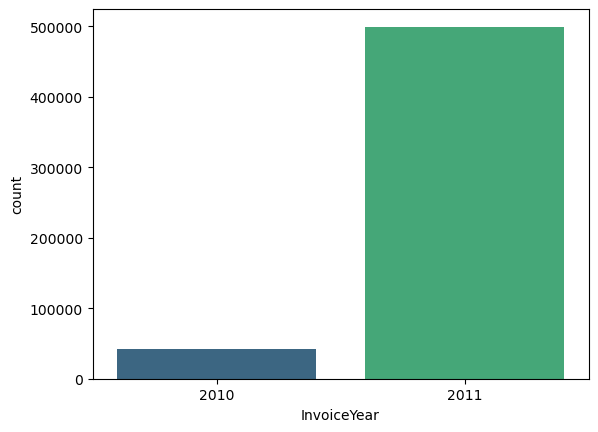

In [172]:
sns.countplot(data= ecom, x= 'InvoiceYear', palette='viridis')

<AxesSubplot:xlabel='InvoiceDay', ylabel='count'>

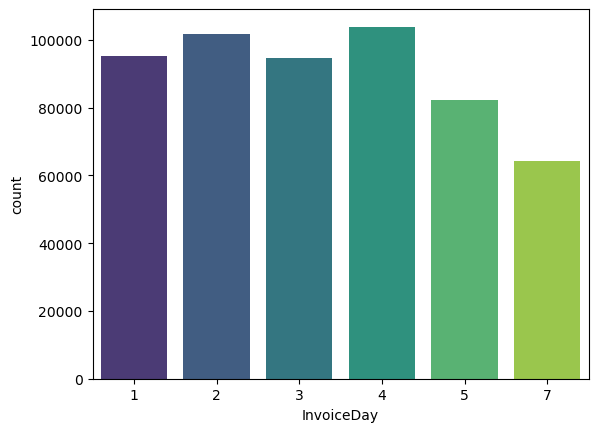

In [171]:
sns.countplot(data=ecom, x='InvoiceDay' , palette='viridis')

<AxesSubplot:xlabel='InvoiceMonth', ylabel='count'>

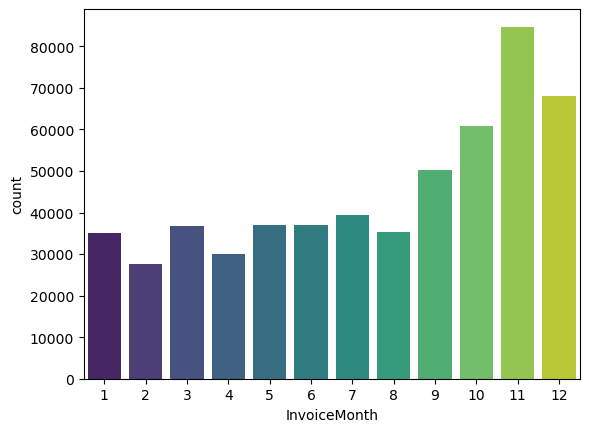

In [170]:
sns.countplot(data=ecom, x='InvoiceMonth', palette='viridis' )

<AxesSubplot:xlabel='InvoiceHour', ylabel='count'>

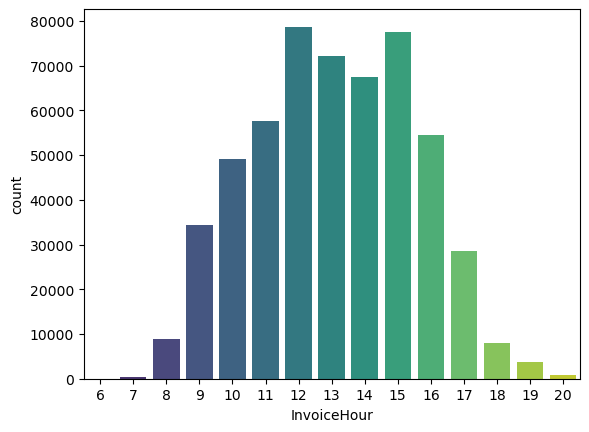

In [143]:
sns.countplot(data=ecom, x='InvoiceHour' , palette='viridis')

In [111]:
ecom.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceHour,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,3,8,12


In [ ]:
#Our column data types and our number of unique variables for every column. 
#There are some object columns that we don't want to work with. Instead of dropping them, let's create a sub_dataframe

In [112]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       541909 non-null  object        
 8   InvoiceYear   541909 non-null  int64         
 9   InvoiceDay    541909 non-null  UInt32        
 10  InvoiceHour   541909 non-null  int64         
 11  InvoiceMonth  541909 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 48.1+ MB


In [113]:
ecom.nunique()

InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
InvoiceYear         2
InvoiceDay          6
InvoiceHour        15
InvoiceMonth       12
dtype: int64

In [118]:
ecom.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceYear', 'InvoiceDay',
       'InvoiceHour', 'InvoiceMonth'],
      dtype='object')

In [121]:
sub_df = ecom[['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceYear', 'InvoiceDay','InvoiceHour',
              'InvoiceMonth']]

In [122]:
sub_df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceHour,InvoiceMonth
0,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,3,8,12
1,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,3,8,12
2,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,3,8,12
3,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,3,8,12
4,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,3,8,12


In [ ]:
#Checking the null values. Almost 25 percent of our Customer ID column is empty. So we cannot trust  this column.

In [159]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Quantity      541909 non-null  int64         
 1   InvoiceDate   541909 non-null  datetime64[ns]
 2   UnitPrice     541909 non-null  float64       
 3   CustomerID    406829 non-null  float64       
 4   Country       541909 non-null  object        
 5   InvoiceYear   541909 non-null  int64         
 6   InvoiceDay    541909 non-null  UInt32        
 7   InvoiceHour   541909 non-null  int64         
 8   InvoiceMonth  541909 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 35.7+ MB


In [160]:
(sub_df.isnull().sum()['CustomerID'] / 541909) * 100

24.926694334288598

In [ ]:
#Crucial Info 5 -- Most of our orders are from United Kingdom. Our operation center could be in UK.

In [165]:
sub_df.groupby(by='Country').sum()['Quantity'].sort_values(ascending=False)

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [ ]:
#Crucial Info 6 -- Most of our customers are also from United Kingdom. 
#However since we have Nan values in this column, this info is not 100 percent accurate. 
#For example we had, 4769 total order quantity from Hong Kong while we don't have any customers from there according
#to this data.

In [136]:
sub_df.groupby(by='Country').nunique()['CustomerID'].sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [ ]:
#NaN values can be seen.

In [162]:
sub_df[sub_df['Country'] == 'Hong Kong']

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceHour,InvoiceMonth
69623,60,2011-01-24 14:24:00,1.25,NaN,Hong Kong,2011,1,14,1
69624,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong,2011,1,14,1
69625,6,2011-01-24 14:24:00,3.75,NaN,Hong Kong,2011,1,14,1
69626,28,2011-01-24 14:24:00,0.21,NaN,Hong Kong,2011,1,14,1
69627,12,2011-01-24 14:24:00,0.85,NaN,Hong Kong,2011,1,14,1
...,...,...,...,...,...,...,...,...,...
423776,30,2011-10-28 08:20:00,2.95,NaN,Hong Kong,2011,5,8,10
423777,36,2011-10-28 08:20:00,0.65,NaN,Hong Kong,2011,5,8,10
423778,8,2011-10-28 08:20:00,3.75,NaN,Hong Kong,2011,5,8,10
465423,-1,2011-11-14 13:26:00,326.10,NaN,Hong Kong,2011,1,13,11


In [ ]:
#Crucial Info 7 -- The customer countries by year difference. 
#It seems like we expanded our operations to a different countries or receive orders from them.

In [168]:
sub_df[sub_df['InvoiceYear'] == 2010]['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain'], dtype=object)

In [169]:
sub_df[sub_df['InvoiceYear'] == 2011]['Country'].unique()

array(['United Kingdom', 'Sweden', 'Italy', 'Portugal', 'France',
       'Belgium', 'Bahrain', 'Germany', 'EIRE', 'Australia', 'Spain',
       'Japan', 'Israel', 'Cyprus', 'Netherlands', 'Poland',
       'Switzerland', 'Finland', 'Greece', 'Hong Kong', 'Singapore',
       'Iceland', 'Channel Islands', 'Lebanon', 'Austria', 'Norway',
       'United Arab Emirates', 'Denmark', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)